In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#PREVIEW DATA

df = pd.read_csv("data/Plant_1_Generation_Data.csv")
display(df.head(7000))

df2 = pd.read_csv("data/Plant_1_Weather_Sensor_Data.csv")
display(df2.head(100))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000
...,...,...,...,...,...,...,...
6995,18-05-2020 11:15,4135001,VHMLBKoKgIrUVDU,7270.714286,711.928571,1192.000000,7228289.000
6996,18-05-2020 11:15,4135001,WRmjgnKYAwPKWDb,7116.375000,696.862500,1170.250000,7050274.250
6997,18-05-2020 11:15,4135001,YxYtjZvoooNbGkE,7155.857143,700.728571,1159.857143,7201388.857
6998,18-05-2020 11:15,4135001,ZnxXDlPa8U1GXgE,7154.428571,700.585714,1168.000000,6543906.000


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
95,2020-05-16 02:30:00,4135001,HmiyD2TTLFNqkNe,21.510409,19.592692,0.0
96,2020-05-16 02:45:00,4135001,HmiyD2TTLFNqkNe,21.496287,19.624870,0.0
97,2020-05-16 03:00:00,4135001,HmiyD2TTLFNqkNe,21.645913,20.065206,0.0
98,2020-05-16 03:15:00,4135001,HmiyD2TTLFNqkNe,21.674314,20.112160,0.0


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00


Date Time Range: Min = 2020-05-15 00:00:00, Max = 2020-06-17 23:45:00
Irradiation Range: Min = 0.00, Max = 1.22
Ambient Temperature Range: Min = 20.40, Max = 35.25
Module Temperature Range: Min = 18.14, Max = 65.55


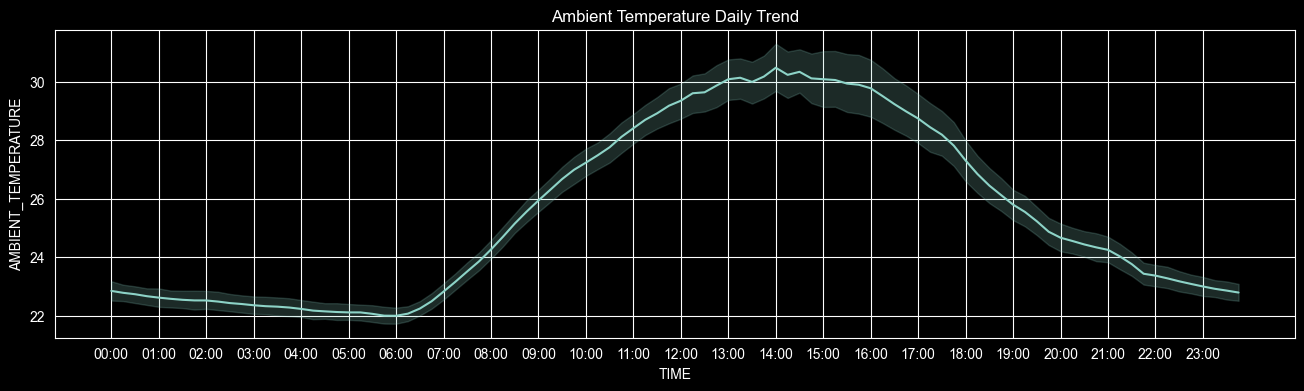

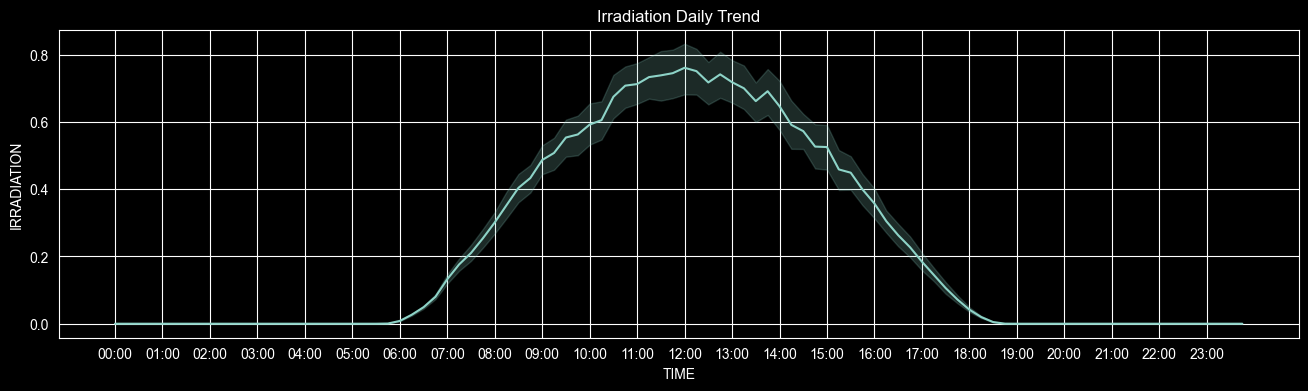

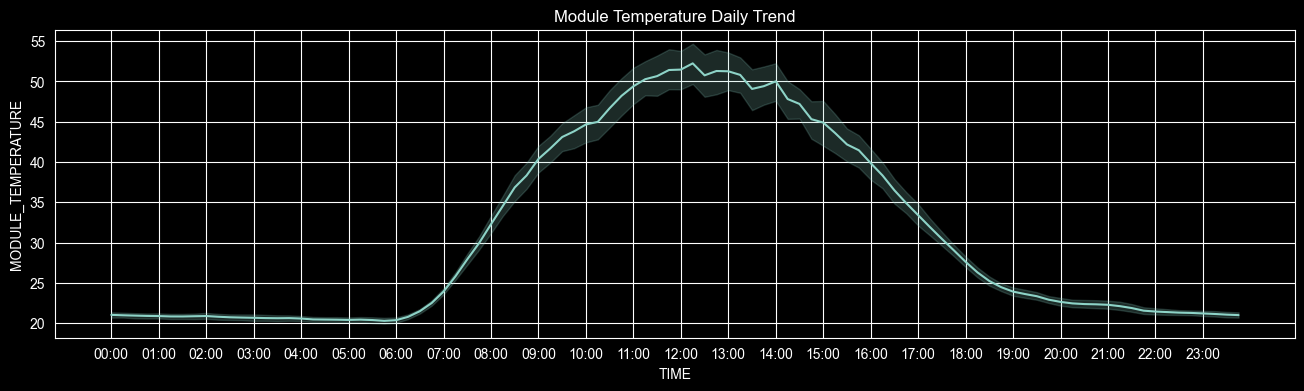

In [4]:
#SENSOR DATA EDA
df2_prep = df2.copy()
df2_prep[['DATE', 'TIME']] = df2['DATE_TIME'].str.split(' ', expand=True)

display(df2_prep.head())

print(
    f"Date Time Range: "
    f"Min = {df2['DATE_TIME'].min()}, "
    f"Max = {df2['DATE_TIME'].max()}"
)

print(
    f"Irradiation Range: "
    f"Min = {df2['IRRADIATION'].min():.2f}, "
    f"Max = {df2['IRRADIATION'].max():.2f}"
)

print(
    f"Ambient Temperature Range: "
    f"Min = {df2['AMBIENT_TEMPERATURE'].min():.2f}, "
    f"Max = {df2['AMBIENT_TEMPERATURE'].max():.2f}"
)

print(
    f"Module Temperature Range: "
    f"Min = {df2['MODULE_TEMPERATURE'].min():.2f}, "
    f"Max = {df2['MODULE_TEMPERATURE'].max():.2f}"
)

df2_prep["TIME"] = pd.to_datetime(df2_prep["TIME"], format="%H:%M:%S")
hourly_ticks = df2_prep["TIME"].dt.floor("h").drop_duplicates()


#AMBIENT TEMP PLOT
plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df2_prep,
    x="TIME",
    y="AMBIENT_TEMPERATURE"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Ambient Temperature Daily Trend")

#IRRADIATION PLOT
plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df2_prep,
    x="TIME",
    y="IRRADIATION"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Irradiation Daily Trend")

#MODULE TEMP PLOT
plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df2_prep,
    x="TIME",
    y="MODULE_TEMPERATURE"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Module Temperature Daily Trend")

plt.show()

From our EDA of the plant's sensor data, we find out a few details and trends:

* During mid May to mid June, ambient temperature reached a low around 6am and peaked around 2pm.
* Irradiation trends seem to match that of module temperature.
    * Irradiation and module temperature also peak around 2pm.

(68778, 7)
22


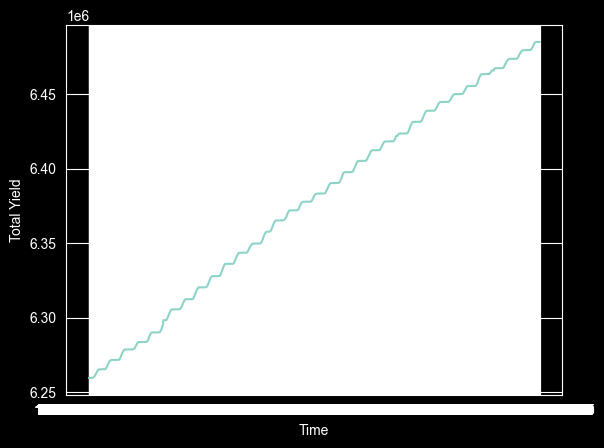

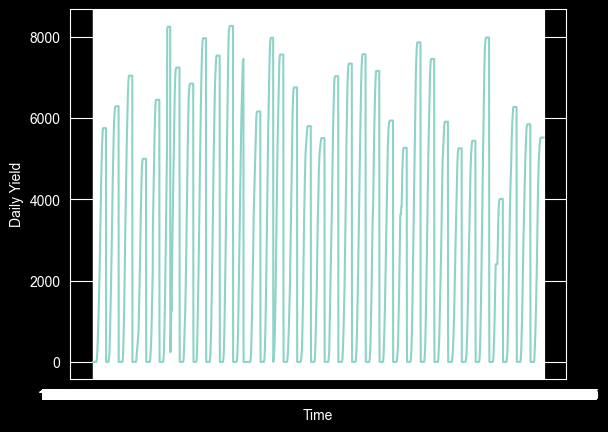

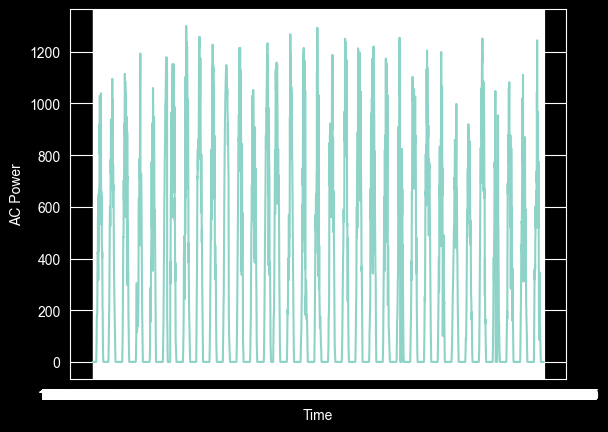

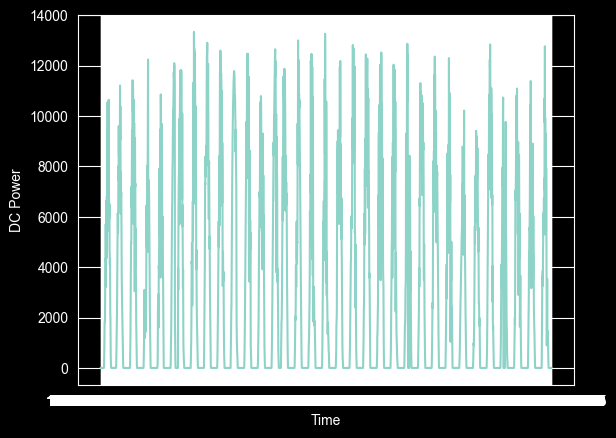

In [5]:
#PLANT GENERATION EDA: SINGLE INVERTER

print(df.shape)
print(df['SOURCE_KEY'].nunique())

df_ex = df[df["SOURCE_KEY"] == '1BY6WEcLGh8j5v7']

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["TOTAL_YIELD"])
plt.xlabel("Time")
plt.ylabel("Total Yield")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["DAILY_YIELD"])
plt.xlabel("Time")
plt.ylabel("Daily Yield")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["AC_POWER"])
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.show()

plt.figure()
plt.plot(df_ex["DATE_TIME"], df_ex["DC_POWER"])
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.show()

Observing the variables of a single inverter, we can observe some patterns regarding power production:

* Power production follows a intermittent daily cycle which always zeros out at night.
* Total yield increases relatively linear while following a step pattern.
* AC and DC power trends are almost exact on a macro level. It seems like DC Power ~= 10 * AC Power.
* There are some observable similarities between AC/DC Power and Daily Yield, but the relation is not as direct.

In [6]:
df1_prep = df.copy()
df1_prep[['DATE', 'TIME']] = df['DATE_TIME'].str.split(' ', expand=True)
df1_prep['DATE_TIME'] = pd.to_datetime(df1_prep["DATE_TIME"], format='%d-%m-%Y %H:%M')
df1_prep

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,15-05-2020,00:00
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,15-05-2020,00:00
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,15-05-2020,00:00
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,15-05-2020,00:00
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,15-05-2020,00:00
...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,17-06-2020,23:45
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,17-06-2020,23:45
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,17-06-2020,23:45
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,17-06-2020,23:45


In [7]:
%%sql
--SQL query averaging metrics per inverter and daily timestamp

SELECT SOURCE_KEY, TIME,
       AVG(DC_POWER) AVG_DC_POWER,
       AVG(AC_POWER) AVG_AC_POWER,
       AVG(DAILY_YIELD) AVG_DAILY_YIELD FROM df1_prep
GROUP BY SOURCE_KEY, TIME
ORDER BY SOURCE_KEY, TIME;

,SOURCE_KEY,TIME,AVG_DC_POWER,AVG_AC_POWER,AVG_DAILY_YIELD
0,1BY6WEcLGh8j5v7,00:00,0.0,0.0,533.631336
1,1BY6WEcLGh8j5v7,00:15,0.0,0.0,0.000000
2,1BY6WEcLGh8j5v7,00:30,0.0,0.0,0.000000
3,1BY6WEcLGh8j5v7,00:45,0.0,0.0,0.000000
4,1BY6WEcLGh8j5v7,01:00,0.0,0.0,0.000000
...,...,...,...,...,...
2107,zVJPv84UY57bAof,22:45,0.0,0.0,5885.212121
2108,zVJPv84UY57bAof,23:00,0.0,0.0,5792.812500
2109,zVJPv84UY57bAof,23:15,0.0,0.0,5787.258065
2110,zVJPv84UY57bAof,23:30,0.0,0.0,5787.258065


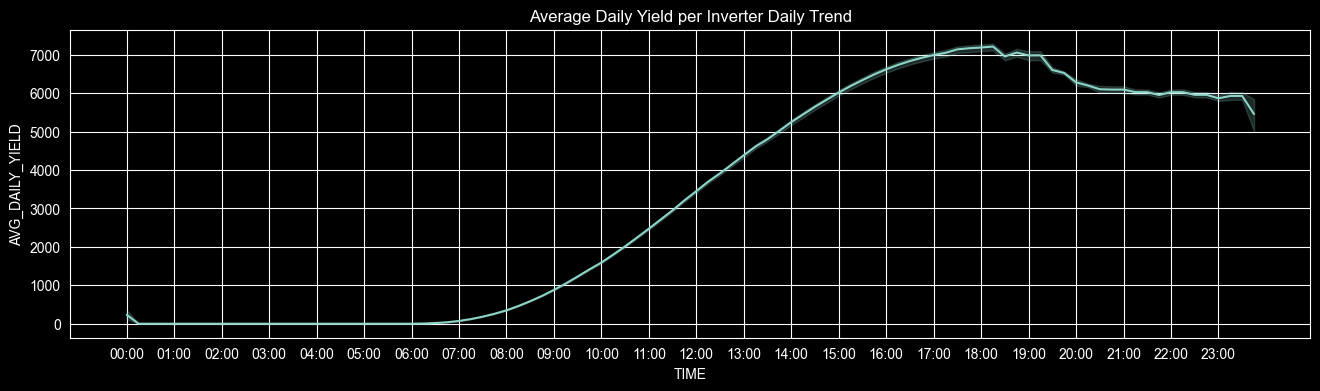

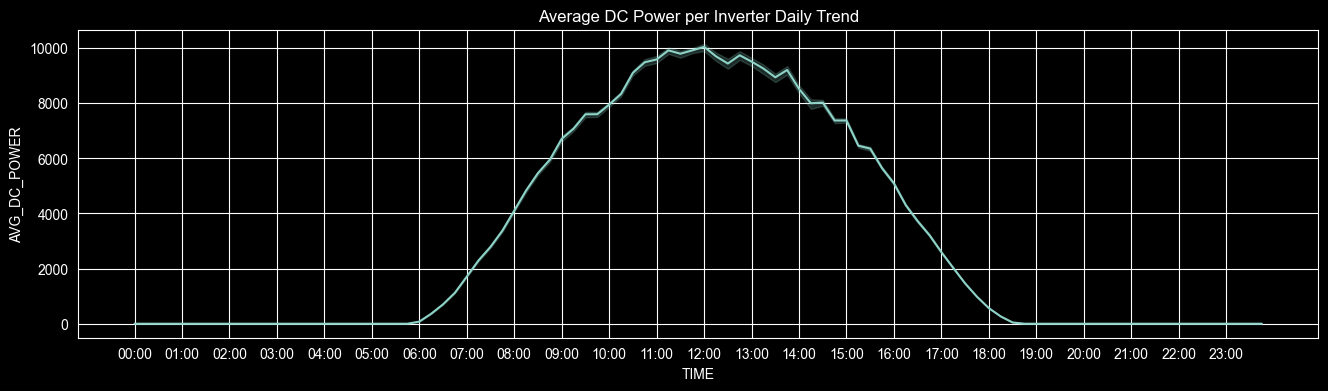

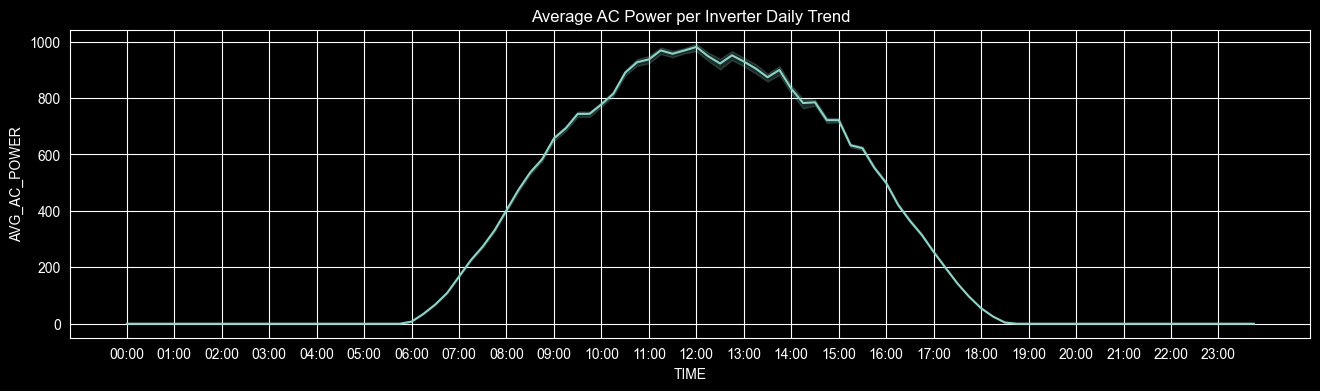

In [8]:
#INVERTER AGGREGATED DAILY TRENDS

time_dt = pd.to_datetime(df_sql1["TIME"], format="%H:%M")
hourly_ticks = time_dt.dt.floor("h").drop_duplicates()

plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df_sql1,
    x=time_dt,
    y="AVG_DAILY_YIELD"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Average Daily Yield per Inverter Daily Trend")

plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df_sql1,
    x=time_dt,
    y="AVG_DC_POWER"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Average DC Power per Inverter Daily Trend")

plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df_sql1,
    x=time_dt,
    y="AVG_AC_POWER"
)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels(hourly_ticks.dt.strftime("%H:%M"))
plt.title("Average AC Power per Inverter Daily Trend")
plt.show()

* DC and AC Power peak around 12pm, which is 2 hours earlier than irradiation, module temperature, and ambient temperature.
* Yield stops increasing shortly after 6pm
    * Strangely, there seems to be dips in daily yield in hours after 6pm. This doesn't make physical sense since daily yield only accumulates within a day.

In [9]:
%%sql
--DROP IN DAILY YIELD AFTER HOURS CAUSED BY BUGGED MEASURE

SELECT SOURCE_KEY, DATE_TIME, AC_POWER, DAILY_YIELD FROM df1_prep
WHERE SOURCE_KEY = '1BY6WEcLGh8j5v7' AND (TIME = '21:00' OR TIME = '23:00')
ORDER BY SOURCE_KEY, DATE_TIME
OFFSET 50;

,SOURCE_KEY,DATE_TIME,AC_POWER,DAILY_YIELD
0,1BY6WEcLGh8j5v7,2020-06-10 21:00:00,0.0,5911.0
1,1BY6WEcLGh8j5v7,2020-06-10 23:00:00,0.0,5911.0
2,1BY6WEcLGh8j5v7,2020-06-11 21:00:00,0.0,5257.0
3,1BY6WEcLGh8j5v7,2020-06-11 23:00:00,0.0,5257.0
4,1BY6WEcLGh8j5v7,2020-06-12 21:00:00,0.0,5441.0
5,1BY6WEcLGh8j5v7,2020-06-12 23:00:00,0.0,5441.0
6,1BY6WEcLGh8j5v7,2020-06-13 21:00:00,0.0,7984.0
7,1BY6WEcLGh8j5v7,2020-06-13 23:00:00,0.0,7984.0
8,1BY6WEcLGh8j5v7,2020-06-14 21:00:00,0.0,4012.0
9,1BY6WEcLGh8j5v7,2020-06-14 23:00:00,0.0,4012.0


Investigating this further, the dips in daily yield may be explained by missing/zeroed daily yield reports possibly due to inverter bugs/ malfunctions/ maintenance.

Since our EDA uncovered a similar but not one-to-one relation between AC/DC Power and Daily Yield, I attempted to approximate Daily Yield using AC Power.
Since energy the accumulation of power over time. Mathematically, energy is the integral of power with respects to time.
I used to a working sum of AC power / 4 to approximate daily yield.

In [10]:
%%sql
--APPROXIMATING DAILY YIELD USING AC POWER CALCULATION

SELECT SOURCE_KEY, DATE_TIME, AC_POWER, DAILY_YIELD,
    SUM(AC_POWER / 4) OVER (
        PARTITION BY DATE
        ORDER BY TIME
    ) DAILY_YIELD_APPROX
FROM df1_prep
WHERE SOURCE_KEY = '1BY6WEcLGh8j5v7'
ORDER BY DATE_TIME;

,SOURCE_KEY,DATE_TIME,AC_POWER,DAILY_YIELD,DAILY_YIELD_APPROX
0,1BY6WEcLGh8j5v7,2020-05-15 00:00:00,0.0,0.0,0.000000
1,1BY6WEcLGh8j5v7,2020-05-15 00:15:00,0.0,0.0,0.000000
2,1BY6WEcLGh8j5v7,2020-05-15 00:30:00,0.0,0.0,0.000000
3,1BY6WEcLGh8j5v7,2020-05-15 00:45:00,0.0,0.0,0.000000
4,1BY6WEcLGh8j5v7,2020-05-15 01:00:00,0.0,0.0,0.000000
...,...,...,...,...,...
3149,1BY6WEcLGh8j5v7,2020-06-17 22:45:00,0.0,5521.0,5489.291607
3150,1BY6WEcLGh8j5v7,2020-06-17 23:00:00,0.0,5521.0,5489.291607
3151,1BY6WEcLGh8j5v7,2020-06-17 23:15:00,0.0,5521.0,5489.291607
3152,1BY6WEcLGh8j5v7,2020-06-17 23:30:00,0.0,5521.0,5489.291607


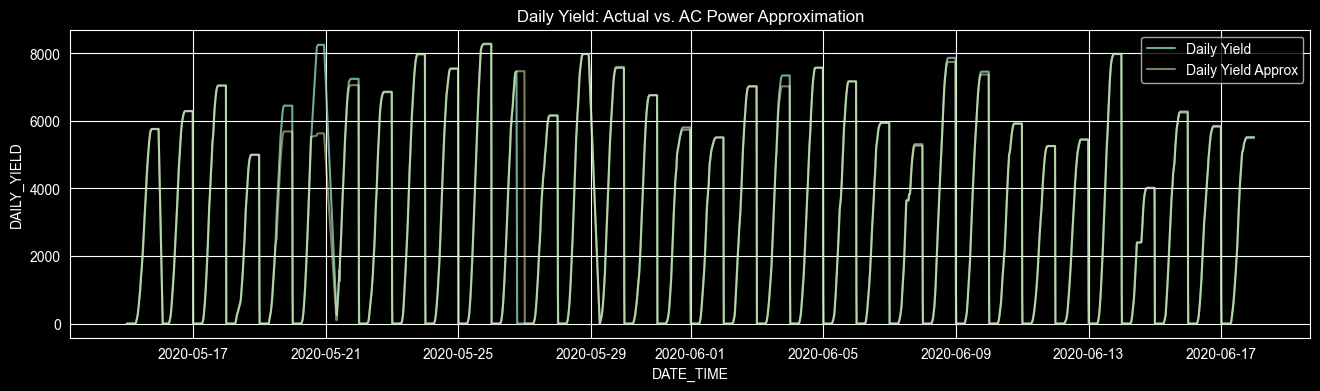

In [11]:
#PLOT ACTUAL VS APPROXIMATION

plt.figure(figsize=(16, 4))
ax = sns.lineplot(
    data=df_sql4,
    x="DATE_TIME",
    y="DAILY_YIELD",
    label="Daily Yield",
    alpha=0.8
)
sns.lineplot(
    data=df_sql4,
    x="DATE_TIME",
    y="DAILY_YIELD_APPROX",
    ax=ax,
    label="Daily Yield Approx",
    alpha=0.5
)

plt.title("Daily Yield: Actual vs. AC Power Approximation")
plt.show()


As the plot shows, the approximation is normally very close. There are some exceptions on a few days. I suspect these to be reporting errors, but further inspection could explain the discrepancies further.

In [12]:
df['DATE_TIME'] = pd.to_datetime(
    df['DATE_TIME'],
    format='%d-%m-%Y %H:%M'
)
df['DATE_TIME'] = df['DATE_TIME'].dt.strftime(
    '%m-%d-%Y %H:%M'
)

df2['DATE_TIME'] = pd.to_datetime(
    df2['DATE_TIME'],
    format='%Y-%m-%d %H:%M:%S'
)
df2['DATE_TIME'] = df2['DATE_TIME'].dt.strftime(
    '%m-%d-%Y %H:%M'
)

In [13]:
%%sql
SELECT
    DATE_TIME,
    SUM(DC_POWER) AS PLANT_DC_PWR,
    SUM(AC_POWER) AS PLANT_AC_PWR,
    SUM(DAILY_YIELD) AS PLANT_DAILY_YIELD
  FROM df
  GROUP BY DATE_TIME
ORDER BY DATE_TIME;

,DATE_TIME,PLANT_DC_PWR,PLANT_AC_PWR,PLANT_DAILY_YIELD
0,05-15-2020 00:00,0.0,0.0,0.000000
1,05-15-2020 00:15,0.0,0.0,0.000000
2,05-15-2020 00:30,0.0,0.0,0.000000
3,05-15-2020 00:45,0.0,0.0,0.000000
4,05-15-2020 01:00,0.0,0.0,0.000000
...,...,...,...,...
3153,06-17-2020 22:45,0.0,0.0,129571.000000
3154,06-17-2020 23:00,0.0,0.0,129571.000000
3155,06-17-2020 23:15,0.0,0.0,129571.000000
3156,06-17-2020 23:30,0.0,0.0,129571.000000


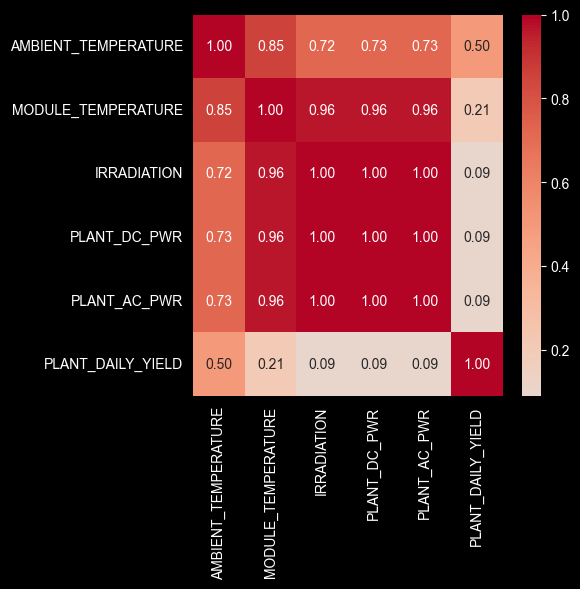

In [31]:
#CORRELATION MATRIX

df1_merge = df2[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
df2_merge = df_agg
df_corr = pd.merge(df1_merge, df2_merge, on='DATE_TIME')

plt.figure(figsize=(6, 6))
sns.heatmap(
    df_corr.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.tight_layout()
plt.show()

We see that there's a strong correlation between many variables in our data.
* Irradiation, AC Power, and DC Power have a direct relationship between each other.
* Module temperature is very strongly correlated to all variables besides daily yield.
* Ambient temperature has moderately strong correlations with all variables.
* Daily yield is not strongly correlated with other variables probably because it is an accumulated metric.